# Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate? 

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Data

Download and add the .csv files to the same folder as your notebook.

In [3]:
df_tesla = pd.read_csv('./Datasets/TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('./Datasets/Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('./Datasets/Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('./Datasets/UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration

### Tesla

**Challenge**: <br>
<ul>
<li>What are the shapes of the dataframes? </li>
<li>How many rows and columns? </li>
<li>What are the column names? </li>
<li>Complete the f-string to show the largest/smallest number in the search data column</li> 
<li>Try the <code>.describe()</code> function to see some useful descriptive statistics</li>
<li>What is the periodicity of the time series data (daily, weekly, monthly)? </li>
<li>What does a value of 100 in the Google Trend search popularity actually mean?</li>
</ul>

In [4]:
#=======================================================================Just looking at the Tesla Dataset==============================================================================# 

    # Checing the shape/ Columns of the dataset 
df_tesla.shape

    # No need to rename the columns to make it easier 
df_tesla.columns
df_tesla.rename(columns = {"MONTH":"month", 
                           "TSLA_WEB_SEARCH" : "search_results", 
                           "TSLA_USD_CLOSE" : "closing_share_price" }, 
                inplace=True)

    # Checking the N/A Values 
df_tesla.isna().sum()
            # Confirmed no missing values 
    # Check the data types 
df_tesla.dtypes
            # Need to convert the dates to datetime module instead of a list 
df_tesla["month"]=pd.to_datetime(df_tesla["month"])

    # Check the initial descriptive stats of the dataset
df_tesla.describe()

    # Could also run the percentage of the data that are outliers as well if needed. 

,month,search_results,closing_share_price
count,124,124.000000,124.000000
mean,2015-07-17 05:48:23.225806336,8.725806,50.962145
min,2010-06-01 00:00:00,2.000000,3.896000
25%,2012-12-24 06:00:00,3.750000,7.352500
50%,2015-07-16 12:00:00,8.000000,44.653000
75%,2018-02-08 00:00:00,12.000000,58.991999
max,2020-09-01 00:00:00,31.000000,498.320007
std,NaN,5.870332,65.908389


### Unemployment

In [5]:
#============================================================================Looking at the unemployment dataset==========================================================================#

# check the shape of the dataset 
df_unemployment.shape

# Check if there needs to be an adjustment of the columns 
df_unemployment.columns
df_unemployment.rename(columns = {"MONTH":"month", 
                                  "UE_BENEFITS_WEB_SEARCH":"web_searches",
                                  'UNRATE':"unemployment_rate"}, 
                                  inplace = True )

# Check if there are missing values and account for them 
df_unemployment.isna().sum()
            # No missing values 
# Check the datatypes 
df_unemployment.dtypes
df_unemployment["month"]=pd.to_datetime(df_unemployment["month"])
            # Reasonable data type 
# Get an initial descriptive statistics 
df_unemployment.describe()
# Check the nature and types of outliers 

,month,web_searches,unemployment_rate
count,181,181.000000,181.000000
mean,2011-07-02 01:51:22.872928256,35.110497,6.217680
min,2004-01-01 00:00:00,14.000000,3.700000
25%,2007-10-01 00:00:00,21.000000,4.700000
50%,2011-07-01 00:00:00,26.000000,5.400000
75%,2015-04-01 00:00:00,45.000000,7.800000
max,2019-01-01 00:00:00,100.000000,10.000000
std,NaN,20.484925,1.891859


### Bitcoin 

In [6]:
#============================================================================Looking at the Monthly bitcoin trends==========================================================================#

# check the shape of the dataset 
df_btc_search.shape

# Check if there needs to be an adjustment of the columns 
df_btc_search.columns
df_btc_search.rename(columns ={"MONTH":"month", 
                                  "BTC_NEWS_SEARCH":"web_searches"},
                                  inplace = True )

# Check if there are missing values and account for them 
df_btc_search.isna().sum()
            # No missing values 
# Check the datatypes 
df_btc_search.dtypes
df_btc_search["month"]=pd.to_datetime(df_btc_search["month"])
            # Reasonable data type 
# # Get an initial descriptive statistics 
df_btc_search.describe()
# Check the nature and types of outliers 


,month,web_searches
count,73,73.000000
mean,2017-08-31 09:32:03.287671296,15.013699
min,2014-09-01 00:00:00,3.000000
25%,2016-03-01 00:00:00,5.000000
50%,2017-09-01 00:00:00,14.000000
75%,2019-03-01 00:00:00,18.000000
max,2020-09-01 00:00:00,100.000000
std,NaN,15.146959


In [7]:
#============================================================================Looking at the Daily Bitcoin Price==========================================================================#

# check the shape of the dataset 
df_btc_price.shape

# Check if there needs to be an adjustment of the columns 
df_btc_price.columns
df_btc_price.rename(columns ={"DATE":"date", 
                              "CLOSE":"closing_price ", 
                              "VOLUME": "coins_traded"},
                                  inplace = True )

# Check if there are missing values and account for them 
df_btc_price.isna().sum()
#             # There are two missing values. Hence, do listwise deletion. 
df_btc_price.dropna(inplace= True)

#Check the datatypes 
df_btc_price.dtypes
df_btc_price["date"]=pd.to_datetime(df_btc_price["date"])
# #             # Reasonable data type 
# # Get an initial descriptive statistics 
df_btc_price.describe()
# # # Check the nature and types of outliers 


,date,closing_price,coins_traded
count,2203,2203.000000,2.203000e+03
mean,2017-09-22 00:35:57.058556672,4429.421245,8.043622e+09
min,2014-09-17 00:00:00,178.102997,5.914570e+06
25%,2016-03-20 12:00:00,433.629502,6.029915e+07
50%,2017-09-22 00:00:00,3637.520020,2.018890e+09
75%,2019-03-26 12:00:00,7997.372803,1.322478e+10
max,2020-09-28 00:00:00,19497.400391,7.415677e+10
std,NaN,4148.150071,1.176529e+10


### Extracting the largest and smallest values from describe()

In [8]:
print(f'Largest value for Tesla in Web Search:{df_tesla["search_results"].describe()["max"]}')
print(f'Smallest value for Tesla in Web Search: {df_tesla["search_results"].describe()["min"]}')

Largest value for Tesla in Web Search:31.0
Smallest value for Tesla in Web Search: 2.0


In [9]:
print(f'Largest value for Unemployment in Web Search:{df_unemployment["web_searches"].describe()["max"]}')
print(f'Smallest value for Unemployment in Web Search: {df_unemployment["web_searches"].describe()["min"]}')

Largest value for Unemployment in Web Search:100.0
Smallest value for Unemployment in Web Search: 14.0


### Converting from Daily to Monthly Data

[Pandas .resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) <br>

In [18]:
#============================================================== How to make the datasets comparable: Bitcoin data==========================================================================#
df_monthly_btc = df_btc_price.resample(rule="ME", on= "date").last()
        # There is a difference between the resampling  section which is until  the list function. The data frame is only created when you give it the last function to create a table. 
print(df_monthly_btc.index)


DatetimeIndex(['2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31',
               '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31',
               '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31',
               '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31',
               '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
      

## Data Visualisation

### Bitcoin Price relative to the Search Volume 

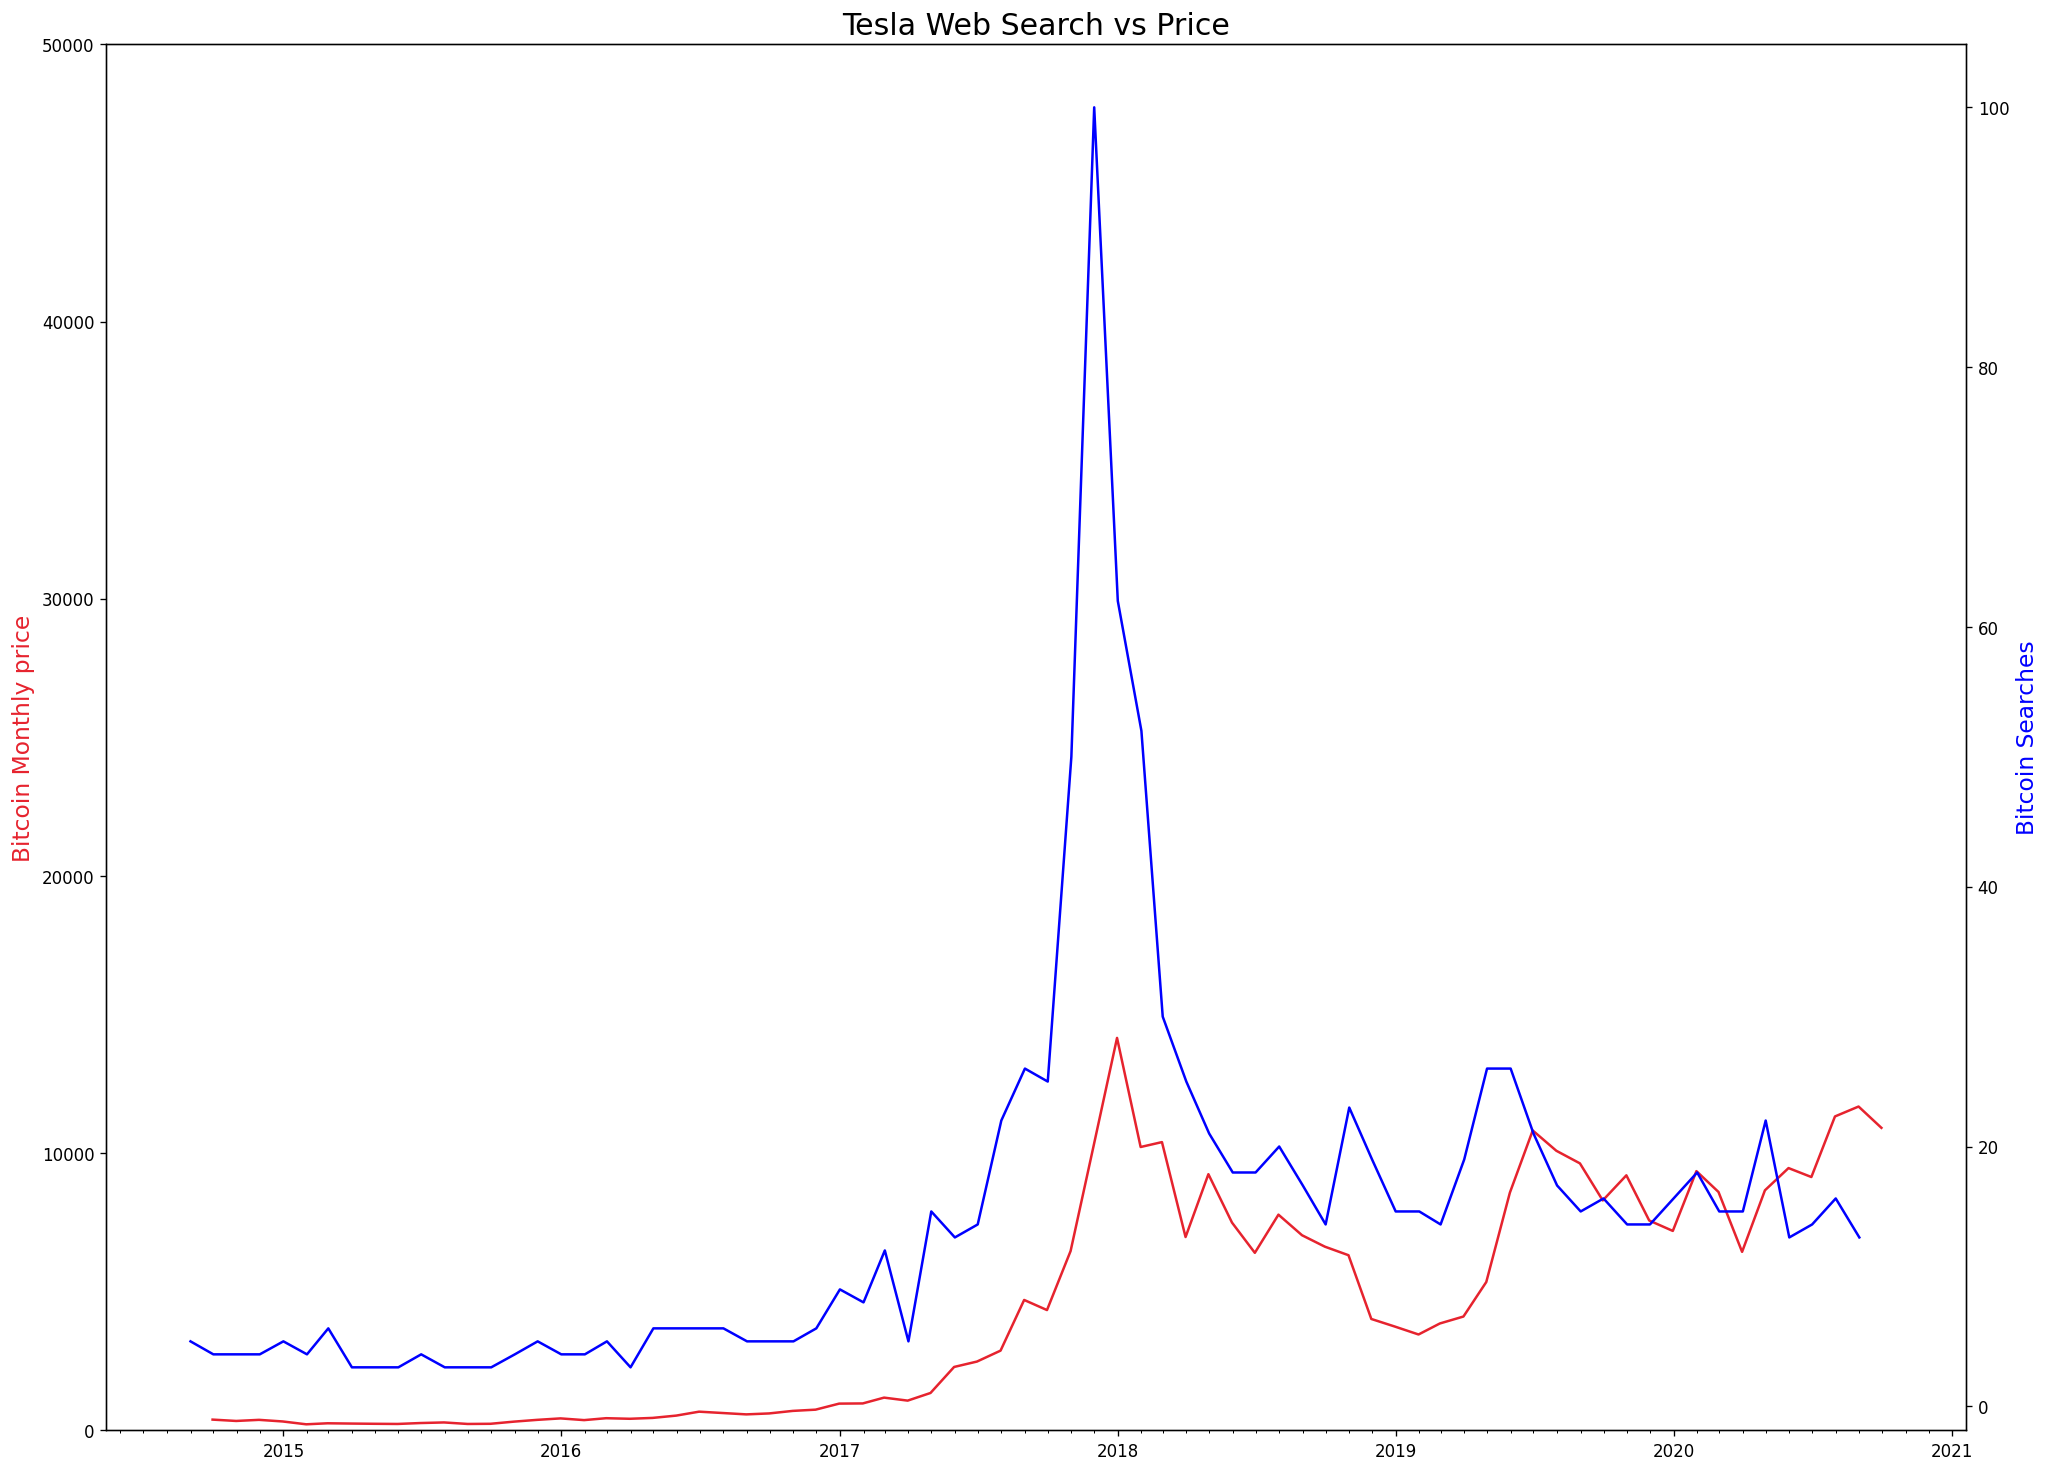

In [42]:
#  Size of the diagram: 
plt.figure(figsize =(20,15), dpi= 120)

# Title of the diagram: 
plt.title('Tesla Web Search vs Price', fontsize=18)

# Gettig twin axes
ax1 = plt.gca()
ax2 = ax1.twinx()

# Pltting the correct axis 
ax1.plot(df_monthly_btc.index, df_monthly_btc["closing_price "], color= "#E6232E")
ax2.plot(df_btc_search["month"],df_btc_search["web_searches"],  color = "b")

# Labels
ax1.set_ylabel("Bitcoin Monthly price", color="#E6232E", fontsize = 14)
ax2.set_ylabel("Bitcoin Searches",color=  "b", fontsize = 14)

                # Can style using the hex codes or the prebuilt colours 
# Can set limits 
ax1.set_ylim([0, 50000])
        # ax1.set_xlim([df_tesla["month"].min(), df_tesla["month"].max()])
        ## Example of X limit above 

# Can add tick marks to the diagram 
    # Start by importing the dates
import matplotlib.dates as mdates
years =  mdates.YearLocator()
months =  mdates.MonthLocator()
years_fmt =   mdates.DateFormatter("%Y")


ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months )










# show the chart 
plt.show()

### Tesla Stock Price v.s. Search Volume

**Challenge:** Plot the Tesla stock price against the Tesla search volume using a line chart and two different axes. Label one axis 'TSLA Stock Price' and the other 'Search Trend'. 

**Challenge**: Add colours to style the chart. This will help differentiate the two lines and the axis labels. Try using one of the blue [colour names](https://matplotlib.org/3.1.1/gallery/color/named_colors.html) for the search volume and a HEX code for a red colour for the stock price. 
<br>
<br>
Hint: you can colour both the [axis labels](https://matplotlib.org/3.3.2/api/text_api.html#matplotlib.text.Text) and the [lines](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D) on the chart using keyword arguments (kwargs).  

**Challenge**: Make the chart larger and easier to read. 
1. Increase the figure size (e.g., to 14 by 8). 
2. Increase the font sizes for the labels and the ticks on the x-axis to 14. 
3. Rotate the text on the x-axis by 45 degrees. 
4. Make the lines on the chart thicker. 
5. Add a title that reads 'Tesla Web Search vs Price'
6. Keep the chart looking sharp by changing the dots-per-inch or [DPI value](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figure.html). 
7. Set minimum and maximum values for the y and x axis. Hint: check out methods like [set_xlim()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_xlim.html). 
8. Finally use [plt.show()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.show.html) to display the chart below the cell instead of relying on the automatic notebook output.

How to add tick formatting for dates on the x-axis. 

### Bitcoin (BTC) Price v.s. Search Volume

**Challenge**: Create the same chart for the Bitcoin Prices vs. Search volumes. <br>
1. Modify the chart title to read 'Bitcoin News Search vs Resampled Price' <br>
2. Change the y-axis label to 'BTC Price' <br>
3. Change the y- and x-axis limits to improve the appearance <br>
4. Investigate the [linestyles](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html ) to make the BTC price a dashed line <br>
5. Investigate the [marker types](https://matplotlib.org/3.2.1/api/markers_api.html) to make the search datapoints little circles <br>
6. Were big increases in searches for Bitcoin accompanied by big increases in the price?

### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

**Challenge** Plot the search for "unemployment benefits" against the unemployment rate. 
1. Change the title to: Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate <br>
2. Change the y-axis label to: FRED U/E Rate <br>
3. Change the axis limits <br>
4. Add a grey [grid](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.grid.html) to the chart to better see the years and the U/E rate values. Use dashes for the line style<br> 
5. Can you discern any seasonality in the searches? Is there a pattern? 

**Challenge**: Calculate the 3-month or 6-month rolling average for the web searches. Plot the 6-month rolling average search data against the actual unemployment. What do you see in the chart? Which line moves first?


### Including 2020 in Unemployment Charts

**Challenge**: Read the data in the 'UE Benefits Search vs UE Rate 2004-20.csv' into a DataFrame. Convert the MONTH column to Pandas Datetime objects and then plot the chart. What do you see?